## <font color='darkblue'>Preface</font>
([article source](https://towardsdatascience.com/beautiful-decision-tree-visualizations-with-dtreeviz-af1a66c1c180)) <font size='3ptx'>**Improve the old way of plotting the decision trees and never go back!**</font>

**[Decision trees](https://en.wikipedia.org/wiki/Decision_tree) are a very important class of machine learning models and they are also building blocks of many more advanced algorithms, such as Random Forest or the famous XGBoost**. The trees are also a good starting point for a baseline model, which we subsequently try to improve upon with more complex algorithms.

**One of the biggest advantages of the decision trees is their interpretability** — after fitting the model, it is effectively a set of rules that can be used to predict the target variable. That is also why it is easy to plot the rules and show them to stakeholders, so they can easily understand the model’s underlying logic. Of course, provided that the tree is not too deep.

Visualizing the decision trees can be really simple using a combination of [**scikit-learn**](https://scikit-learn.org/stable/) and [**matplotlib**](https://matplotlib.org/stable/index.html). However, **there is a nice library called [dtreeviz](https://github.com/parrt/dtreeviz), which brings much more to the table and creates visualizations that are not only prettier but also convey more information about the decision process.**

In this article, I will first show the “old way” of plotting the decision trees and then introduce the improved approach using [**dtreeviz**](https://github.com/parrt/dtreeviz).

## <font color='darkblue'>Setup</font>
As always, we need to start by importing the required libraries.

In [1]:
#!pip install dtreeviz

In [9]:
import matplotlib.pyplot as plt
import os

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris, load_boston
from sklearn import tree
from dtreeviz.trees import *
from sklearn import datasets
from sklearn import tree

os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'

Then, we load the [Iris data set from scikit-learn](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html). We will also go over a regression example, but we will load the [Boston housing data set](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html) for this later on.

In [3]:
iris = datasets.load_iris()
X = iris.data  
y = iris.target

## <font color='darkblue'>The “old way”</font>
The next step involves creating the training/test sets and fitting the decision tree classifier to the Iris data set. In this article, we focus purely on visualizing the decision trees. Thus, we do not pay any attention to fitting the model or finding a good set of hyperparameters (<font color='brown'>there are a lot of articles on these topics</font>). **The only thing that we will “tune” is the maximum depth of the tree — we constraint it to 3, so the trees can still fit in the image and remain readable.**

In [4]:
# prepare the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fit the classifier
clf = tree.DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

Now that we have a fitted decision tree model and we can proceed to visualize the tree. We start with the easiest approach — using the [plot_tree function from scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html).

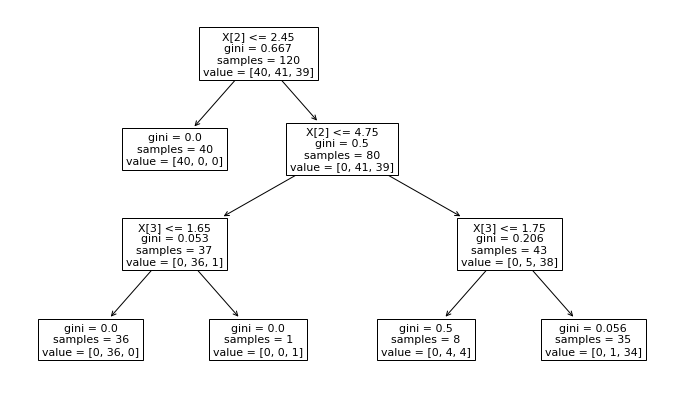

In [5]:
plt.figure(figsize=(12,7))  # set plot size (denoted in inches)
tree.plot_tree(clf, fontsize=11);

OK, not bad for a one-liner. **But it is not very readable, for example, there are no feature names** (<font color='brown'>only their column indices</font>) **or class labels**. We can easily improve that by running the following snippet.

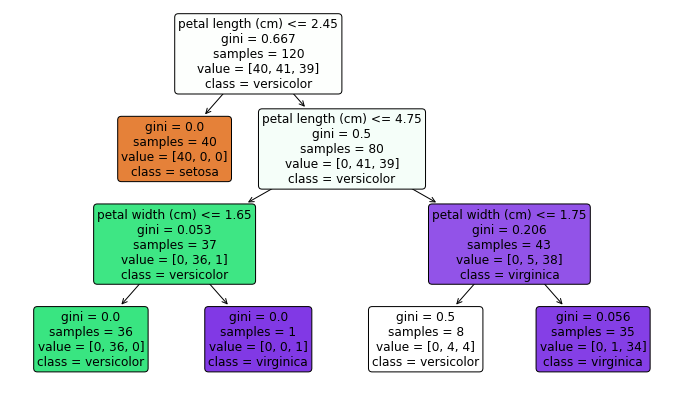

In [6]:
plt.figure(figsize=(12,7))  # set plot size (denoted in inches)
tree.plot_tree(
    clf,
    feature_names=iris.feature_names, 
    class_names=iris.target_names,
    rounded=True, 
    filled=True
);

Much better! Now, we can quite easily interpret the decision tree. It is also possible to use the [**graphviz library**](https://pypi.org/project/graphviz/) for visualizing the decision trees, however, the outcome is very similar, with the same set of elements as the graph above. That is why we will skip it here, but you can find the [implementation in the Notebook on GitHub](https://github.com/erykml/medium_articles/blob/master/Machine%20Learning/decision_tree_visualization.ipynb).

## <font color='darkblue'>dtreeviz in action</font>
Having seen the old way of plotting the decision trees, let’s jump right into the [**dtreeviz**](https://pypi.org/project/dtreeviz/) approach.

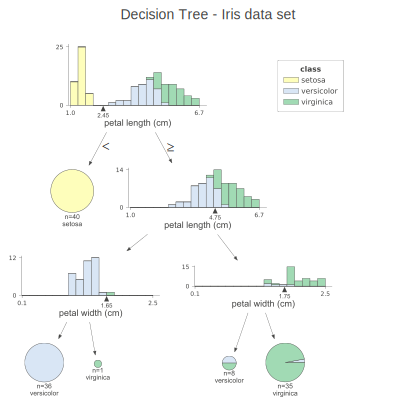

<Figure size 1080x504 with 0 Axes>

In [16]:
fig = plt.figure(figsize=(15, 7))  # set plot size (denoted in inches)

viz = dtreeviz(
    clf, 
    x_data=X_train,
    y_data=y_train,
    target_name='class',
    feature_names=iris.feature_names, 
    class_names=list(iris.target_names), 
    title="Decision Tree - Iris data set",
)
viz

The code snippet is pretty much self-explanatory, so we can move on to the outcome. First of all, let’s take a moment to acknowledge how big of an improvement it is, especially given that the function call is very similar.

Let’s go over the plot step by step. At each node, we can see a stacked histogram of the feature that is used for splitting the observations, colored by class. This way, we can see how the classes are segregated by each split. The small triangle with the value at the x-axis is the splitting point. In the first histogram, we can clearly see that all observations of **the `setosa` class have petal length smaller than 2.45 cm.**

The right branches of the tree indicate selecting the values larger or equal to the splitting value, while the left one lesser than the splitting value. **The leaf nodes are represented as pie charts, which show what fraction of the observations within the leaf belongs to which class.** This way, we easily see which class is the majority one, so also the model’s prediction.

One thing we do not see at this plot is the value of the Gini coefficient at each node. In my opinion, the histogram provides more intuition about the split and the value of the coefficient might not be that relevant in case of a presentation for the stakeholders either way.

**<font color='darkred'>Note</font>**: We can also create a similar visualization for the test set, we just need to replace the `x_data` and `y_data` arguments while calling the function.

If you are not a fan of the histograms and want to simplify the plot, you can specify `fancy=False` to receive the following simplified plot.

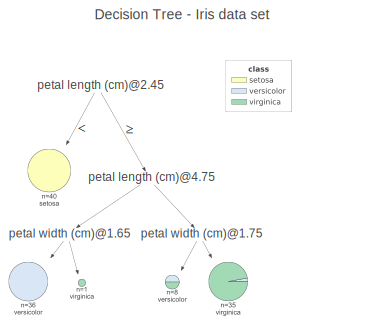

In [17]:
viz = dtreeviz(
    clf, 
    x_data=X_train,
    y_data=y_train,
    target_name='class',
    feature_names=iris.feature_names, 
    class_names=list(iris.target_names), 
    title="Decision Tree - Iris data set",
    fancy=False
)
viz

**Another handy feature of dtreeviz which improves the model’s interpretability is path highlighting of a particular observation on the plot**. This way, we clearly see which features contributed to the class prediction.

Using the snippet below, we highlight the path of the first observation of the test set.

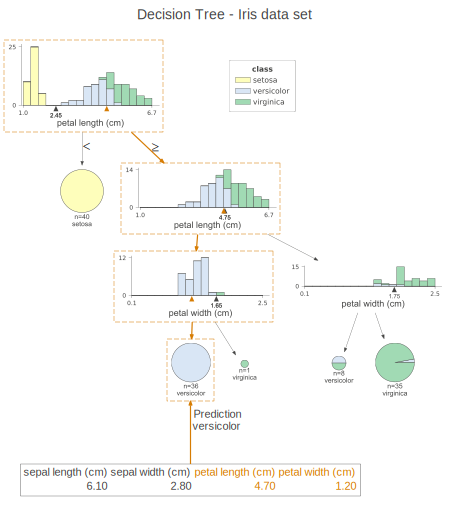

In [18]:
viz = dtreeviz(
    clf, 
    x_data=X_train,
    y_data=y_train,
    target_name='class',
    feature_names=iris.feature_names, 
    class_names=list(iris.target_names),
    title="Decision Tree - Iris data set",
    #orientation="LR", 
    X=X_test[0]
)
viz

The plot is very similar to the previous one, however, **the orange highlight clearly shows which path the observation followed.** Additionally, we can see the orange triangle at each of the histograms. It represents the indicated observation’s value of the given feature. At the very end, we see the values of all the features of this observation, with the ones used for decision highlighted in orange. **In this case, only two features were used for predicting that the observation belongs to the `versicolor class`.**

**<font color='darkred'>Tip</font>**: We can also change the orientation of the plots from top-to-bottom to left-to-right by setting orientation=”LR”. We do not show it in this article, as the charts will not be scaled that nicely for devices with a narrower screen.

Lastly, we can print the decisions used for this observation’s prediction in plain English. To do so, we run the following command.

In [19]:
print(explain_prediction_path(clf, X_test[0], 
                              feature_names=iris.feature_names, 
                              explanation_type="plain_english"))

2.45 <= petal length (cm)  < 4.75
petal width (cm) < 1.65



This way, we can clearly see the conditions that this observation fulfills.

## <font color='darkblue'>Regression example</font>
We have already covered a classification example, which showed most of the interesting functionalities of the library. But for completeness’ sake, we also go over an example of a regression problem, to show how the plots differ. We use another popular data set — the [**Boston housing one**](https://www.kaggle.com/c/boston-housing). It’s a problem in which we use a set of different areas to predict the median housing price within certain areas of Boston.

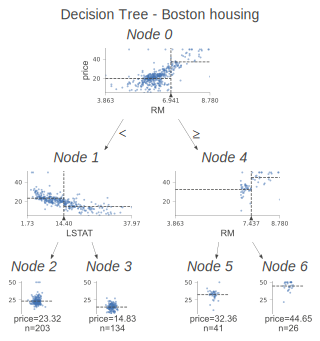

In [21]:
# prepare the data
boston = load_boston()
X = boston.data
y = boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fir the regressor
reg = tree.DecisionTreeRegressor(max_depth=2, random_state=42)
reg.fit(X_train, y_train)

# plot the tree
viz = dtreeviz(reg,
               x_data=X_train,
               y_data=y_train,
               target_name='price',
               feature_names=boston.feature_names,
               title="Decision Tree - Boston housing",
               show_node_labels = True)
viz

**The code already feels similar. The only change is that we added `show_node_labels = True`. It can be especially handy for larger decision trees**. So while discussing the plot with a group, it is very easy to indicate which split we are discussing by the node’s number.

Let’s dive into the differences between classification trees and regression ones. **This time, instead of looking at histograms, we inspect scatterplots of the feature used for the split vs. the target**. On those scatterplots, we see some dashed lines. Their interpretation is as follows:
* **Horizontal lines are the target’s mean** for the left and right buckets in decision nodes.
* **Vertical lines are the split point.** It is the very same information as represented by the black triangle, however, it makes comparing the horizontal lines easier -> easy separation between the sides.

In the leaf nodes, the dashed line shows the mean of the target within the leaf, which is also the model’s prediction.

**We already showed that we can highlight the decision path for a certain observation.** We can take it a step further and only plot the nodes used for that prediction. We do so by specifying `show_just_path=True`. The following plot shows only the selected nodes from the tree above.

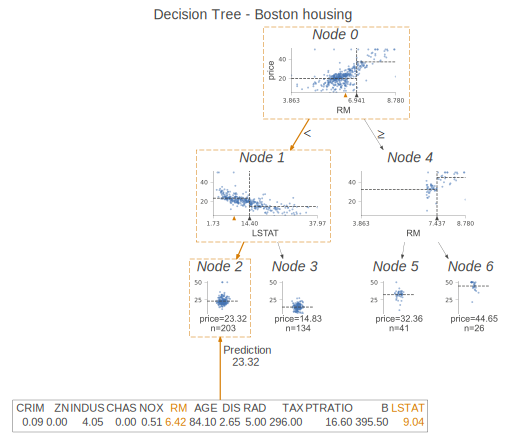

In [22]:
viz = dtreeviz(
    reg,
    x_data=X_train,
    y_data=y_train,
    target_name='price',
    feature_names=boston.feature_names,
    title="Decision Tree - Boston housing",
    show_node_labels = True,
    X=X_test[0]
)
viz

## <font color='darkblue'>Conclusions</font>
**In this article, I showed how to use the [dtreeviz library](https://github.com/parrt/dtreeviz) for creating elegant and insightful visualizations of decision trees.** Having played around with it for a bit, I will definitely keep on using it as the go-to tool for visualizing decision trees. I do believe that the plots created **using this library are much easier to understand for people who do not work with ML on a daily basis and can help in conveying the model’s logic to the stakeholders**.

It is also worth mentioning that dtreeviz supports some visualizations for XGBoost and Spark MLlib trees.

## <font color='darkblue'>Supplement</font>
* [FAQ - “RuntimeError: Make sure the Graphviz executables are on your system's path” after installing Graphviz 2.38](https://stackoverflow.com/questions/35064304/runtimeerror-make-sure-the-graphviz-executables-are-on-your-systems-path-aft)